In [1]:
import numpy as np
import matplotlib.pyplot as plt # 绘图库
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
%load_ext autoreload
%autoreload 2

## 此示例为了传达一些基本的概念

* [纯概念传送门](https://jiazifa.github.io/tree.github.io/%E7%AC%94%E8%AE%B0/2018/02/01/%E9%80%BB%E8%BE%91%E5%9B%9E%E5%BD%92%E8%A6%81%E7%82%B9%E6%80%BB%E7%BB%93/)

**我们将使用线性回归来拟合一元一次方程**

In [2]:
w = 100
b = 5
# 制造一些数据 , 从 -10 - 10 步长为 0.1
origin_x = np.arange(-10, 10, 0.1) 
origin_y = origin_x * w + b # 在这里我们设置的 w = -3, b = 2

# 制作一些测试数据，来验证我们的准确率
test_x = np.arange(3, 5, 0.5)
test_y = test_x * w + b
origin_x.shape

(200,)

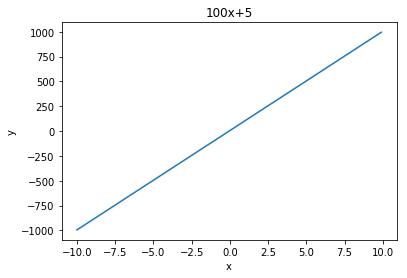

In [3]:
# 现在绘制我们的数据，来观察一下
plt.title(str(w) + 'x' + '+' + str(b))
plt.plot(origin_x, origin_y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
# 引入辅助函数 sigmoid 
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

# 初始化参数的函数
def init_with_zeros(dim: int):
    w = np.zeros((dim, 1))
    b = 0
    return w, b

# 求导数（对参数求偏导，后续更新参数值）
def prograde(w, b, X, Y):
    m = Y.shape[1] # 样本数
    A = np.dot(w.T, X) + b
    cost = 1/m*np.sum((A-Y)*(A-Y))# 获得损失函数, 这里我们使用了L2 等价于np.dot((Y - yhat), (Y - yhat).T)
    dw = 1/m*np.dot(X, (A-Y).T) # w 的偏导数
    db = 1/m*np.sum(A-Y) # b 的偏导数
    grads = {
        "dw": dw,
        "db": db
    }
    return grads, cost

In [5]:
# 优化流程
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=True):
    """
    w, b, X, Y: params
    num_iterations: 迭代次数
    learning_rate: 决定了修正参数的步长为 learning_rate * 修正量
    """
    costs = []
    for i in range(num_iterations):
        grads, cost = prograde(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w - learning_rate * dw
        b = b - learning_rate * db
        if i % int(num_iterations/10) == 0:
            if print_cost:
                print("Cost after iteration %i: %f" %(i, cost))
            costs.append(cost)
    params = {
        "w": w,
        "b": b
    }
    return params, costs


# 流程总结

* 观察数据
* 初始化参数值
* 迭代优化参数
    * 根据损失函数计算出偏导数
    * 根据学习率修正参数，继续迭代

In [6]:

origin_x = origin_x.reshape(1, -1)
origin_y = origin_y.reshape(1, -1)

test_x = test_x.reshape(1, -1)
test_y = test_y.reshape(1, -1)

w, b = init_with_zeros(origin_x.shape[0])
params, costs = optimize(w, b, origin_x, origin_y, 1500, 0.01)
params

Cost after iteration 0: 333325.000000
Cost after iteration 150: 1.303229
Cost after iteration 300: 0.063926
Cost after iteration 450: 0.003136
Cost after iteration 600: 0.000154
Cost after iteration 750: 0.000008
Cost after iteration 900: 0.000000
Cost after iteration 1050: 0.000000
Cost after iteration 1200: 0.000000
Cost after iteration 1350: 0.000000


{'w': array([[100.]]), 'b': 4.999998536147974}

# 使用 sklearn 的版本

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47
diabetes_X_train.shape = (422, 1)
diabetes_y_train.shape = (422,)


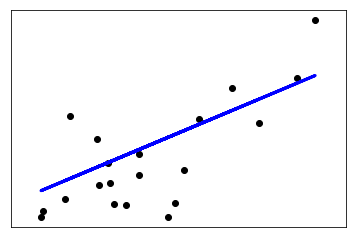

In [7]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

print('diabetes_X_train.shape = ' + str(diabetes_X_train.shape))
print('diabetes_y_train.shape = ' + str(diabetes_y_train.shape))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()